In [3]:


recordcount = [1000, 1000, 1000, 1000, 10000, 10000, 10000, 10000]
operationcount = [1000, 10000, 100000, 10000000, 1000, 10000, 100000, 10000000]
throughput = [1, 2, 10, 4, 20, 40, 35, 5]



In [40]:
import pandas as pd
import re


folder_path = os.path.join(current_dir,folder_path)

# Function to parse the metrics from a given text file
def parse_metrics(file_path):
    print(file_path)
    metrics = {}
    with open(file_path, 'r') as file:
        text = file.read()
        
        # Use regular expressions to find metrics
        runtime_match = re.search(r'RunTime\(ms\), (\d+)', text)
        throughput_match = re.search(r'Throughput\(ops/sec\), ([\d.]+)', text)
        avg_latency_match = re.search(r'\[INSERT\], AverageLatency\(us\), ([\d.]+)', text)
        
        if runtime_match:
            metrics['runtime'] = int(runtime_match.group(1))
        if throughput_match:
            metrics['throughput'] = float(throughput_match.group(1))
        if avg_latency_match:
            metrics['insert_latency'] = float(avg_latency_match.group(1))
    
    return metrics


# Paths to the metrics files for each database
file_path_db1 = 'load/lr_load-wl_a-rc_10000-oc_100000-yugabyte.txt' 
folder_path1 = os.path.join(current_dir,file_path_db1)   # Replace with the actual path to your file
file_path_db2 = 'load/lr_load-wl_a-rc_100000-oc_100000-cockroach.txt'
folder_path2 = os.path.join(current_dir,file_path_db2)  # Replace with the actual path to your file

# Parse the metrics for each database
metrics_db1 = parse_metrics(folder_path1)
metrics_db2 = parse_metrics(folder_path2)

# Create a DataFrame
df = pd.DataFrame({
    'database': ['YugabyteDB', 'CockroachDB'],
    'runtime': [metrics_db1.get('runtime'), metrics_db2.get('runtime')],
    'throughput': [metrics_db1.get('throughput'), metrics_db2.get('throughput')],
    'insert_latency': [metrics_db1.get('insert_latency'), metrics_db2.get('insert_latency')]
})

print(df)

/Users/pratistha99/tpcdi_bechmarking/load/lr_load-wl_a-rc_10000-oc_100000-yugabyte.txt
/Users/pratistha99/tpcdi_bechmarking/load/lr_load-wl_a-rc_100000-oc_100000-cockroach.txt
      database  runtime   throughput  insert_latency
0   YugabyteDB    13996  7144.898542      4043.59688
1  CockroachDB    62992  1587.503175     19859.11472


In [27]:
import pandas as pd
import re


folder_path = os.path.join(current_dir,folder_path)

# Function to parse the metrics from a given text file
def parse_metrics(file_path):
    print(file_path)
    metrics = {}
    with open(file_path, 'r') as file:
        text = file.read()
        
        # Use regular expressions to find metrics
        runtime_match = re.search(r'RunTime\(ms\), (\d+)', text)
        throughput_match = re.search(r'Throughput\(ops/sec\), ([\d.]+)', text)
        read_latency_match = re.search(r'\[READ\], AverageLatency\(us\), ([\d.]+)', text)
        insert_latency_match = re.search(r'\[INSERT\], AverageLatency\(us\), ([\d.]+)', text)
        update_latency_match = re.search(r'\[UPDATE\], AverageLatency\(us\), ([\d.]+)', text)


        
        if runtime_match:
            metrics['runtime'] = int(runtime_match.group(1))
        if throughput_match:
            metrics['throughput'] = float(throughput_match.group(1))
        if insert_latency_match:
            metrics['insert_latency'] = float(insert_latency_match.group(1))
        if update_latency_match:
            metrics['update_latency'] = float(update_latency_match.group(1))
        if read_latency_match:
            metrics['read_latency'] = float(read_latency_match.group(1))
    
    return metrics


# Paths to the metrics files for each database
file_path_db1 = 'run/lr_run-wl_a-rc_100000-oc_100000-yugabyte.txt' 
folder_path1 = os.path.join(current_dir,file_path_db1)   # Replace with the actual path to your file
file_path_db2 = 'run/lr_run-wl_a-rc_100000-oc_100000-cockroach.txt'
folder_path2 = os.path.join(current_dir,file_path_db2)  # Replace with the actual path to your file

# Parse the metrics for each database
metrics_db1 = parse_metrics(folder_path1)
metrics_db2 = parse_metrics(folder_path2)

# Create a DataFrame
df = pd.DataFrame({
    'database': ['YugabyteDB', 'CockroachDB'],
    'runtime': [metrics_db1.get('runtime'), metrics_db2.get('runtime')],
    'throughput': [metrics_db1.get('throughput'), metrics_db2.get('throughput')],
    'read_latency': [metrics_db1.get('read_latency'), metrics_db2.get('read_latency')],
    'insert_latency': [metrics_db1.get('insert_latency'), metrics_db2.get('insert_latency')],
    'update_latency': [metrics_db1.get('update_latency'), metrics_db2.get('update_latency')]


})

print(df)

/Users/pratistha99/tpcdi_bechmarking/run/lr_run-wl_a-rc_100000-oc_100000-yugabyte.txt
/Users/pratistha99/tpcdi_bechmarking/run/lr_run-wl_a-rc_100000-oc_100000-cockroach.txt
      database  runtime   throughput  read_latency  insert_latency  \
0   YugabyteDB    18684  5352.172982   4563.098907     4924.847146   
1  CockroachDB    54857  1822.921414   2408.070535    21361.378363   

   update_latency  
0     5016.247599  
1    43048.325488  


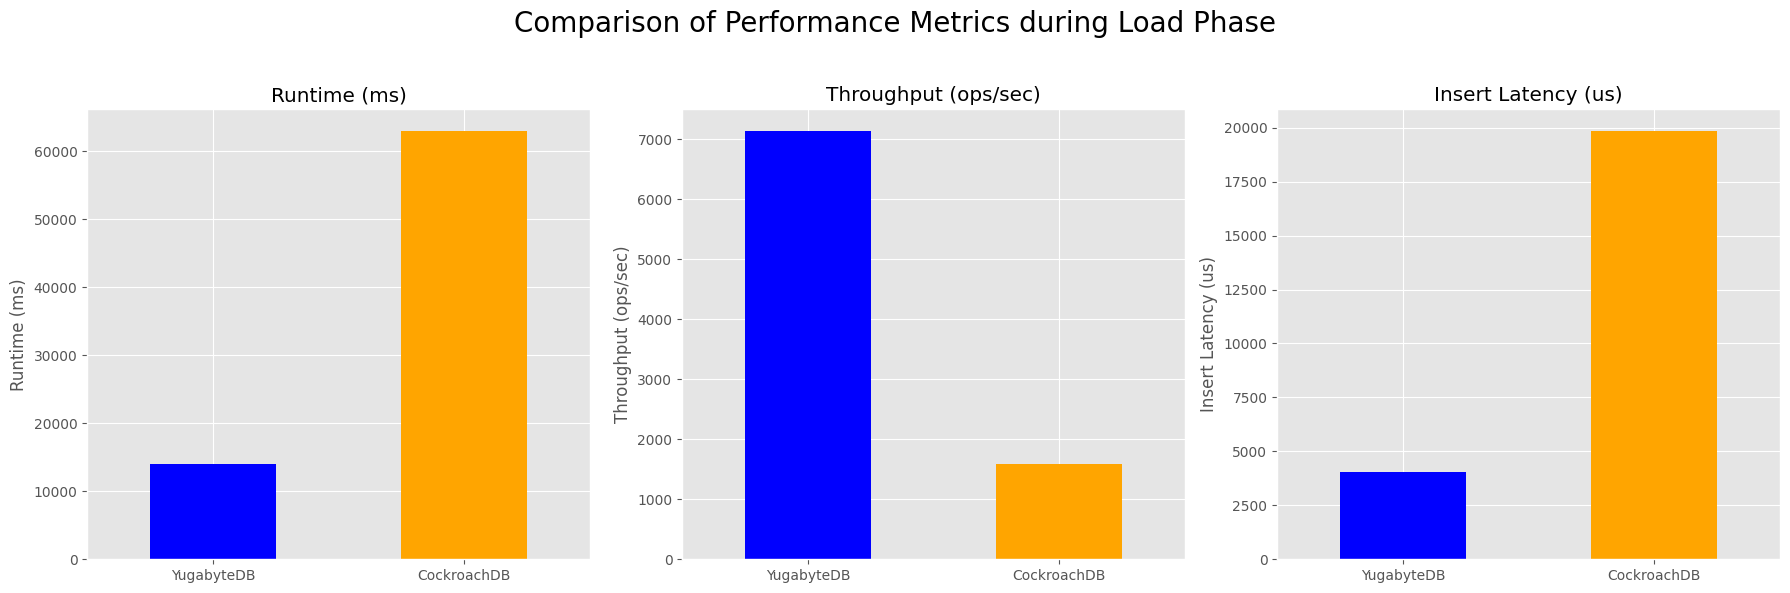

In [45]:
color_map = ['blue', 'orange']

# Set the style
plt.style.use('ggplot')

# Create subplots for each metric
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Plot each metric with its legend
for ax, (metric, title) in zip(axes, [('runtime', 'Runtime (ms)'), ('throughput', 'Throughput (ops/sec)'),('insert_latency', 'Insert Latency (us)')]):
    df.plot(kind='bar', x='database', y=metric, ax=ax, color=color_map, legend=False)
    ax.set_title(title)
    ax.set_xlabel('')
    ax.set_xticklabels(df['database'], rotation=0)
    ax.set_ylabel(title)

# Add a legend to each subplot
# for ax in axes:
#     ax.legend(df['database'], title="Database", loc='upper right')

fig.suptitle('Comparison of Performance Metrics during Load Phase', fontsize=20)
# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Save the figure to a file
plt.savefig('database_metrics_load_comparison.png')

# Display the plot
plt.show()

In [1]:
color_map = ['blue', 'orange']

# Set the style
plt.style.use('ggplot')

# Create subplots for each metric
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(18, 6))

# Plot each metric with its legend
for ax, (metric, title) in zip(axes, [('runtime', 'Runtime (ms)'), ('throughput', 'Throughput (ops/sec)'),('read_latency', 'Read Latency (us)') ,('insert_latency', 'Insert Latency (us)'),('update_latency', 'Update Latency (us)')]):
    df.plot(kind='bar', x='database', y=metric, ax=ax, color=color_map, legend=False)
    ax.set_title(title)
    ax.set_xlabel('')
    ax.set_xticklabels(df['database'], rotation=0)
    ax.set_ylabel(title)

# Add a legend to each subplot
# for ax in axes:
#     ax.legend(df['database'], title="Database", loc='upper right')

fig.suptitle('Comparison of Performance Metrics during Run Phase', fontsize=20)
# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Save the figure to a file
plt.savefig('database_metrics_load_comparison.png')

# Display the plot
plt.show()

NameError: name 'plt' is not defined

### Load Metrics

In [17]:
import os
import re
import pandas as pd

folder_path = os.path.join(current_dir,folder_path)

# Initialize an empty DataFrame
result_df = pd.DataFrame()

# Define a regular expression pattern to extract relevant information
regex_dict  = {'Throughput(ops_per_sec)':r'\[OVERALL\], Throughput\(ops\/sec\), (\d+\.\d+)' ,'RunTime(ms)': r'\[OVERALL\], RunTime\(ms\), (\d+)','InsertLatency(us)':r'\[INSERT\], AverageLatency\(us\), (\d+\.\d+)',
              'CleanupLatency(us)':r'\[CLEANUP\], AverageLatency\(us\), (\d+\.\d+)'}

for key, pat in regex_dict.items():
    result_df = pd.DataFrame()
    for wl in workloads:

        starts_with = f"lr_load-wl_{wl}"
        print(starts_with)
        excel_file_path = f'output_file_load_{wl}.xlsx'
        # Iterate through files in the folder
        for file_name in os.listdir(folder_path):
            
            
            if file_name.endswith(".txt") and file_name.startswith(starts_with):
                # Read the log file
                with open(os.path.join(folder_path, file_name), 'r') as file:
                    log_content = file.read()
    
                # Extract the "rc" and "oc" values from the file name
                rc_value = re.search(r'rc_(\d+)', file_name).group(1)
                oc_value = re.search(r'oc_(\d+)', file_name).group(1)
    
                # Find the Throughput value in the log content
                throughput_match = re.search(pat, log_content)
                # print(key,pat)
    
                if throughput_match:
                    throughput_value = throughput_match.group(1)
                    print(throughput_value)
    
                    # Create a DataFrame for the current file
                    df = pd.DataFrame({f'oc_{oc_value}': [throughput_value]}, index=[f'rc_{rc_value}'])
    
                    # Concatenate the current DataFrame to the result DataFrame
                    result_df = pd.concat([result_df, df])
    
                result_df = result_df.reindex(columns=['oc_1000', 'oc_10000', 'oc_100000']).fillna(0)
                result_df = result_df.apply(pd.to_numeric, errors='coerce')
    
    
    
    
                result_df_grouped = result_df.groupby(result_df.index).max()
                result_df_grouped = result_df_grouped.fillna(0)

                print(result_df_grouped)
    
    
    
    
        # Display the resulting DataFrame
        print(result_df_grouped)

        print(result_df_grouped)
        fig, ax = plt.subplots(figsize=(8, 6))  # Adjust the figure size as needed
        result_df_grouped.plot(kind='bar', title=f'{key} for Workload-{wl} {db}DB', ax=ax)
        plt.xlabel('Record Count (rc)')
        plt.ylabel(key.capitalize())
        plt.tight_layout()
         # Set a constant label for y-axis values
        y_ticks = [0, 5000, 10000, 15000]  # Customize as needed
        plt.yticks(y_ticks, [str(val) for val in y_ticks])
        
        fig.savefig(f'images/loadtest_{db}/{key}_load_workload_{wl}_{db}.png')
        plt.close(fig)

        # if os.path.exists(excel_file_path):
        # # Append the DataFrame to an existing Excel file with a separate sheet
        #     with pd.ExcelWriter(excel_file_path, engine='openpyxl', mode='a') as writer:
        #         result_df_grouped.to_excel(writer, sheet_name=key,index=True)
        # else:
        #     # Create a new Excel file with the DataFrame
        #     result_df_grouped.to_excel(excel_file_path, sheet_name=key,index=True)


lr_load-wl_a
129.183945019313
           oc_1000  oc_10000   oc_100000
rc_100000      0.0       0.0  129.183945
           oc_1000  oc_10000   oc_100000
rc_100000      0.0       0.0  129.183945
           oc_1000  oc_10000   oc_100000
rc_100000      0.0       0.0  129.183945
lr_load-wl_a
774090
           oc_1000  oc_10000  oc_100000
rc_100000      0.0       0.0     774090
           oc_1000  oc_10000  oc_100000
rc_100000      0.0       0.0     774090
           oc_1000  oc_10000  oc_100000
rc_100000      0.0       0.0     774090
lr_load-wl_a
7728.19425
           oc_1000  oc_10000   oc_100000
rc_100000      0.0       0.0  7728.19425
           oc_1000  oc_10000   oc_100000
rc_100000      0.0       0.0  7728.19425
           oc_1000  oc_10000   oc_100000
rc_100000      0.0       0.0  7728.19425
lr_load-wl_a
1745.0
           oc_1000  oc_10000  oc_100000
rc_100000      0.0       0.0     1745.0
           oc_1000  oc_10000  oc_100000
rc_100000      0.0       0.0     1745.0
           oc_

### Run Metrics

In [18]:
import os
import re
import pandas as pd

folder_path = os.path.join(current_dir,folder_path)

# Initialize an empty DataFrame
result_df = pd.DataFrame()

# Define a regular expression pattern to extract relevant information
regex_dict  = {'Throughput(ops_per_sec)':r'\[OVERALL\], Throughput\(ops\/sec\), (\d+\.\d+)' ,'RunTime(ms)': r'\[OVERALL\], RunTime\(ms\), (\d+)','ReadLatency(us)':r'\[READ\], AverageLatency\(us\), (\d+\.\d+)',
               'UpdateLatency(us)':r'\[UPDATE\], AverageLatency\(us\), (\d+\.\d+)',
              'CleanupLatency(us)':r'\[CLEANUP\], AverageLatency\(us\), (\d+\.\d+)'}

for key, pat in regex_dict.items():
    result_df = pd.DataFrame()
    for wl in workloads:

        starts_with = f"lr_run-wl_{wl}"
        print(starts_with)
        excel_file_path = f'output_file_run_{wl}.xlsx'
        # Iterate through files in the folder
        for file_name in os.listdir(folder_path):
            
            
            if file_name.endswith(".txt") and file_name.startswith(starts_with):
                # Read the log file
                with open(os.path.join(folder_path, file_name), 'r') as file:
                    log_content = file.read()
    
                # Extract the "rc" and "oc" values from the file name
                rc_value = re.search(r'rc_(\d+)', file_name).group(1)
                oc_value = re.search(r'oc_(\d+)', file_name).group(1)
    
                # Find the Throughput value in the log content
                throughput_match = re.search(pat, log_content)
                # print(key,pat)
    
                if throughput_match:
                    throughput_value = throughput_match.group(1)
                    print(throughput_value)
    
                    # Create a DataFrame for the current file
                    df = pd.DataFrame({f'oc_{oc_value}': [throughput_value]}, index=[f'rc_{rc_value}'])
    
                    # Concatenate the current DataFrame to the result DataFrame
                    result_df = pd.concat([result_df, df])
                    
                
                result_df = result_df.reindex(columns=['oc_1000', 'oc_10000', 'oc_100000']).fillna(0)
                result_df = result_df.apply(pd.to_numeric, errors='coerce')
    
    
    
    
                result_df_grouped = result_df.groupby(result_df.index).max()
                result_df_grouped = result_df_grouped.fillna(0)
    
    
    
    
        # Display the resulting DataFrame
        
        print(result_df_grouped)
        fig, ax = plt.subplots(figsize=(8, 6))  # Adjust the figure size as needed
        result_df_grouped.plot(kind='bar', title=f'{key} for Workload-{wl} {db}DB', ax=ax)
        plt.xlabel('Record Count (rc)')
        plt.ylabel(key.capitalize())

             # Set a constant label for y-axis values
        y_ticks = [0, 5000, 10000, 15000,20000,25000]  # Customize as needed
        plt.yticks(y_ticks, [str(val) for val in y_ticks])
        
        plt.tight_layout()
        fig.savefig(f'images/runtest_{db}/{key}_run_workload_{wl}_{db}.png')
        plt.close(fig)



        # if os.path.exists(excel_file_path):
        # # Append the DataFrame to an existing Excel file with a separate sheet
        #     with pd.ExcelWriter(excel_file_path, engine='openpyxl', mode='a') as writer:
        #         result_df_grouped.to_excel(writer, sheet_name=key,index=True)
        # else:
        #     # Create a new Excel file with the DataFrame
        #     result_df_grouped.to_excel(excel_file_path, sheet_name=key,index=True)





lr_run-wl_a
360.51495956824726
           oc_1000  oc_10000  oc_100000
rc_100000      0.0       0.0  360.51496
lr_run-wl_a
277381
           oc_1000  oc_10000  oc_100000
rc_100000      0.0       0.0     277381
lr_run-wl_a
267.26944813199316
           oc_1000  oc_10000   oc_100000
rc_100000      0.0       0.0  267.269448
lr_run-wl_a
5981.612712407219
           oc_1000  oc_10000    oc_100000
rc_100000      0.0       0.0  5981.612712
lr_run-wl_a
1573.0
           oc_1000  oc_10000  oc_100000
rc_100000      0.0       0.0     1573.0
